$\newcommand{\dx}{\mathrm{d}x}$
$\newcommand{\dy}{\mathrm{d}y}$
$\newcommand{\dz}{\mathrm{d}z}$
$\newcommand{\du}{\mathrm{d}u}$
$\newcommand{\dv}{\mathrm{d}v}$
$\newcommand{\dX}{\mathrm{d}X}$
$\newcommand{\dY}{\mathrm{d}Y}$
$\newcommand{\dZ}{\mathrm{d}Z}$
$\newcommand{\nm}{\nano\meter}$
$\newcommand{\nmq}[1]{\SI{#1}{\nm}}$
$\newcommand{\newq}[1]{\SI{#1}{\newton}}$
$\newcommand{\kboltz}{k_{\mathrm{B}}}$
$\newcommand{\Deriv}[2]{\frac{\mathrm{d}#1}{\mathrm{d}#2}}$
$\newcommand{\Derivv}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d}#2^2}}$
$\newcommand{\PDeriv}[2]{\frac{\partial #1}{\partial #2}}$
$\newcommand{\half}{\frac{1}{2}}$

$\newcommand{\im}{\mathrm{i}}$
$\newcommand{\ee}{\mathrm{e}}$
$\newcommand{\del}{\partial}$
$\newcommand{\deta}{\mathrm{d}\eta}$
$\newcommand{\ds}{\mathrm{d}s}$
$\newcommand{\eps}{\varepsilon}$
$\newcommand{\sgn}{\mathrm{sgn}}$
$\newcommand{\dt}{\mathrm{d}t}$
$\newcommand{\dtau}{\mathrm{d}\tau}$
$\newcommand{\dd}{\mathrm{d}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import scipy.constants as const
import seaborn as sns
sns.set(font_scale = 2)
# Customizations
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rc('font', family='DejaVu Sans')
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica']
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage[version=4]{mhchem}',
       r'\usepackage{siunitx}',
       r'\sisetup{detect-all}',
       r'\usepackage{helvet}',
       r'\usepackage{sansmath}',
       r'\sansmath',
       r'\usepackage{textgreek}'
] 
from IPython.display import display, Math, Latex
current_palette = sns.color_palette()
sns.set_style("whitegrid", {'axes.linewidth': '1', 'axes.edgecolor': '0.15',
                            "xtick.major.size": 8, "ytick.major.size": 8,
                            "xtick.minor.size": 4, "ytick.minor.size": 4})

# Supplementary material
### Benjamin Santos$^1$, François Vidal$^1$, Laura Cacot$^{1, 2}$, Claude Boucher$^1$
### $^1$INRS - Energie Materiaux Telecomunications, Varennes, QC J3X 1P7, Canada. $^2$Université Toulouse III - Paul Sabatier, 31062 Toulouse, France
#### email: benjamin.santos@emt.inrs.ca

This notebook contains supplementary information as figures and python codes to complement the manuscript "Electrostatic enhancement factor for the coagulation of silicon nanoparticles in low-temperature plasmas". Please read the README.md and LICENSE.txt files.

# Nanodusty plasma parameters

## Plasma parameters

We will assume that the plasma will not be affected by the nanoparticles. We pose the following conditions,

| Parameter | Value   |
|------|------|
| Pressure ($p$)| 0.1 Torr|
| Argon ion density ($n_+$) | 10<sup>15</sup> m<sup>-3</sup>|
| Electron density ($n_e$) | 9.x10<sup>14</sup> m<sup>-3</sup>|
| Electron mean energy ($\varepsilon$) | 3 eV|
| Gas/ion/nanoparticle temperature ($T$) | 300 K |
| Gas density ($n_g$) | 3.x10<sup>21</sup> m<sup>-3</sup>|
| Argon mass ($m_+$) | 6.63x10<sup>-26</sup> Kg|

Here, we impose that the reactor, ions and nanoparticles have the same temperature.

In [2]:
Temperature = 300.0# Particle temperature in Kelvin
KT = const.Boltzmann*Temperature
rho = 2.328*(1e-3/1e-6)# g/cm3 -> Kg/m3
pi = const.pi
eps0 = const.epsilon_0# Vacuum permittivity
echarge = const.elementary_charge# electron charge
Ke = 1.0/(4.0*pi*eps0)# Coulomb's constant
Epsilon_Si = 11.68# Dielectric constant of silicon bulk
emean = 3.# Electron mean energy
electron_density = 9.0E14# electron density
ion_density = 1.0E15# electron and ion density
pi = np.pi
pressure_torr = 0.1# Pressure in reactor
pressure = pressure_torr * 133.322# Pressure in Pascal
ng_num = pressure / KT# Gas density

In [3]:
ng_num

3.2188255028634426e+21

In [4]:
ArMMass = 39.948 #Argon Molecular Mass (NIST) in g/mol
ArMass = (ArMMass / const.Avogadro)/1000.0 #Argon Mass in Kg
ArMass

6.633521358698435e-26

## Silicon nanoparticle parameters

For the Si nanoparticles we have,

| Parameter | Value   |
|------|------|
| Nanoparticle density ($N$) | 10<sup>14</sup> m<sup>-3</sup>|
| Dielectric constant ($\epsilon$) | 11.68 |
| Mass density ($\mu$) | 2.328<sup>3</sup> Kg/m<sup>3</sup> |
| Electron affinity ($E_A$) | 4.05 |

We consider the following nanoparticle parameters for size sections:

| Parameter | Value   |
|------|------|
| Number of sections ($l$) | 100 |
| Minimum diameter ($d_0$) | 1 nm |
| Maximum diameter ($d_l$) | 100 nm |

In [5]:
Si_affinity = 4.05# Silicon bulk electron affinity
NP_density = 1e14# Nanoparticle density
electron_density+NP_density-ion_density

0.0

In [6]:
def volfromrad(r):
    ''' Computes volume from a given radius
    '''
    return (4.0/3.0) * pi * (r)**3

lsec = 100# 50 sections
r0 = 0.5E-9# min radius
rl = 50E-9# max radius

# compute interfaces
radii = np.linspace(r0, rl, lsec, endpoint=True)

# volumes
volumes = volfromrad(radii)

# diameters
diams = 2.0 * radii

## Nanoparticle mean free path

\begin{equation} 
    \lambda = \frac {1}{{\sqrt {2}}N_p \pi d^{2}}.
\end{equation}

In [7]:
def mean_free_path(density, diameter):
    ''' Returns the mean free path for a given density and diameter
    '''
    return 1/(np.sqrt(2)*density*pi*diameter**2)

In [8]:
mean_free_paths = mean_free_path(NP_density, diams)

In [9]:
mean_free_paths.max()

2250.7907903927653

In [10]:
mean_free_paths.min()

0.22507907903927657

## Dusty Debye length

\begin{equation}
 \lambda_{e, i, p} = \sqrt{\frac {\varepsilon_{0}\kboltz T_{e, i, p}}
                             {n_{e, i, p}q_{e}^{2}}},
\end{equation}


\begin{equation}
 \frac{1}{\lambda_{\text{D}}^2} = \frac{1}{\lambda_{\text{e}}^2}
         + \frac{1}{\lambda_{\text{i}}^2}.
\end{equation}


In [11]:
def dusty_debye_length(mean_electron_energy, electron_density,
                       ion_temperature, ion_density, nanoparticle_density):
    ''' Returns the Dusty Debye Length (Shukla), Dusty Debye Length,
        electron Debye length and ion Debye length
    '''    
    electron_debye_length = np.sqrt(mean_electron_energy*const.electron_volt
                                    *const.epsilon_0
                             /(electron_density*echarge**2))
    
    ion_debye_length = np.sqrt(const.Boltzmann*ion_temperature
                               *const.epsilon_0
                               /(ion_density*echarge**2))
    
    dusty_debye = np.sqrt(const.Boltzmann*ion_temperature
                          *const.epsilon_0
                          /(nanoparticle_density*echarge**2))
    
    dusty_debye_length_ = 1.0/np.sqrt(1./electron_debye_length**2
                                      +1./ion_debye_length**2)
    dusty_debye_length2_ = 1.0/np.sqrt(1./electron_debye_length**2
                                      +1./ion_debye_length**2
                                      +1./dusty_debye**2)
    
    return dusty_debye_length_, dusty_debye_length2_, electron_debye_length, ion_debye_length

In [12]:
ddl, ddl2, edebye, idebye = dusty_debye_length(emean, electron_density,
                                               Temperature, ion_density, NP_density)

In [13]:
ddl

3.7652044093399767e-05

In [14]:
ddl2

3.5912380307916382e-05

In [15]:
edebye

0.00042919884306290957

In [16]:
idebye

3.7797769138743015e-05

## Interparticle distance

\begin{equation}
 d = \left({\frac {3}{4\pi n}}\right)^{1/3}.
\end{equation}

In [17]:
def interparticle_distance(density):
    ''' Returns the interparticle distance
    '''
    return np.cbrt(3.0/(4.0*pi*density))

In [18]:
idistance = interparticle_distance(NP_density)

In [19]:
idistance

1.3365046175719759e-05

## Structure parameter

\begin{equation}
  \kappa_{\text{d}} = \frac{d}{\lambda_{\text{D}}}.
\end{equation}


In [20]:
structure_parameter = idistance/ddl

In [21]:
structure_parameter

0.35496203453300934

## Knudsen number

\begin{equation}
  \text{Kn} = \frac{\lambda}{d_p}.
\end{equation}

In [22]:
kn = mean_free_paths/diams

In [23]:
kn.min()

2250790.7903927658

In [24]:
kn.max()

2250790790392.7651

## Coupling parameter

\begin{equation}
  \Gamma = \frac{1}{4\pi \eps_0}\frac{Z^2 e^2}{\kboltz T_p d}\exp(-\kappa_\text{d}).
\end{equation}

In [25]:
def coupling_parameter(nanoparticle_charge, interparticle_distance, structure_parameter):
    ''' Returns the coupling parameter
    '''
    num = nanoparticle_charge**2*echarge**2
    denom = 4.*pi*const.epsilon_0*KT*interparticle_distance
    return np.exp(-structure_parameter)*num/denom

In [26]:
gamma = coupling_parameter(np.arange(1, 296), idistance, structure_parameter)

In [27]:
np.exp(-structure_parameter)

0.70120006409111924

In [28]:
gamma.max()

254.31578397339126

In [29]:
gamma.min()

0.0029223301806767161

# Coagulation kernel

## Coagulation kernel for neutral particles

The coagulation kernel for neutral particles in the free molecular regime is written as, 

\begin{equation}
\beta^{0}_{ij} = \left(\frac{3}{4\pi}\right)^{1/6}
                 \left[\frac{6 \kboltz T}{\rho_p}\left(\frac{1}{v_i}+\frac{1}{v_j} \right)\right]^{1/2}
                 \left(v^{1/3}_i + v^{1/3}_j \right)^2,
\end{equation}

where $v_{i}(v_{j})$ represents the volume of particle $i(j)$,  $\kboltz$ is the Boltzmann constant, $T$ is the
absolute temperature of the reactor, and  $\rho_{p}$ is the particle mass density.

In [30]:
def beta_free(vol1, vol2, temp=Temperature, rho=rho):
    ''' Coagulation kernel in the free molecular regime
    '''   
    beta0 = (3.0/(4.0*pi))**(1/6)*np.sqrt(6.0*const.Boltzmann *temp/rho)
    return beta0 * np.sqrt(1.0/vol1 +1.0/vol2) * (vol1**(1.0/3.0)+vol2**(1.0/3.0))**2

In [31]:
rx, ry = np.meshgrid(radii*1e9, radii*1e9)
dx, dy = 2.0*rx, 2.0*ry
vx, vy = np.meshgrid(volumes, volumes)

In [32]:
bf = beta_free(vx, vy)

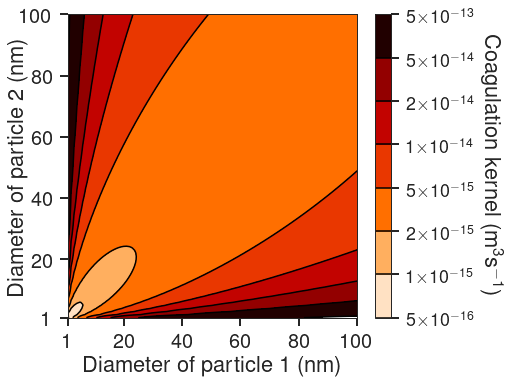

In [33]:
fig, ax = plt.subplots(figsize=(7.5, 5.85))

levels = [5e-16, 1e-15, 2e-15, 5e-15, 1e-14, 2e-14, 5e-14, 5e-13]
cf = ax.contourf(dx, dy, bf, levels=levels, cmap=cm.gist_heat_r,  norm=colors.LogNorm(),
                 vmin=levels[0], vmax=levels[-1])
cs = ax.contour(dx, dy, bf, levels=levels, origin='lower',
                colors='k', linewidths=1.5)
cb = fig.colorbar(cf, ax=ax, ticks=levels)
cb.add_lines(cs)
cb.ax.set_ylabel(r'Coagulation kernel $(\text{m}^3\text{s}^{-1})$', rotation=270, labelpad=30)
cb.ax.tick_params(labelsize=18)

ax.set_xlabel('Diameter of particle 1 (nm)')
ax.set_ylabel('Diameter of particle 2 (nm)', labelpad=-8)
xy=np.arange(0, 120, 20)
xy[0] = 1
plt.xticks(xy, xy)
plt.yticks(xy, xy)

cb.set_ticks(levels)
cb.set_ticklabels([r'$5{\times}10^{-16}$', r'$1{\times}10^{-15}$', r'$2{\times}10^{-15}$', r'$5{\times}10^{-15}$',
                   r'$1{\times}10^{-14}$', r'$2{\times}10^{-14}$', r'$5{\times}10^{-14}$', r'$5{\times}10^{-13}$'])

plt.tight_layout()
plt.savefig('fig1.eps')
plt.show()

In [34]:
np.max(bf)

7.4527112871196538e-13

In [35]:
np.min(bf)

4.1328183938190095e-16

We can also plot the coagulation for a fixed size of particle 2 and a variable size of particle 1.

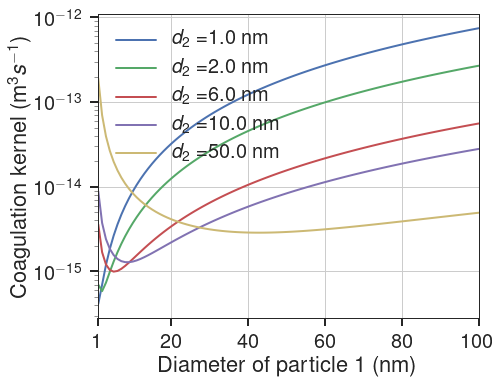

In [36]:
fig, ax = plt.subplots(figsize=(7.5, 5.85))

dlist = [0, 1, 5, 9, 49]
for i, di in enumerate(dlist):
    label = r'$d_2=$'+str(np.around(dx[di][di], decimals=2))+' nm'
    plt.plot(dx[di], bf[di], label=label)


xy=np.arange(0, 120, 20)
xy[0] = 1
plt.xticks(xy, xy)
ax.set_xlabel(r'Diameter of particle 1 (nm)')
ax.set_ylabel(r'Coagulation kernel $(\text{m}^3s^{-1})$')
ax.set_yscale('log')
plt.xlim([1, 100])
plt.legend(loc=2)
plt.tight_layout()
#plt.savefig('fig1.eps')
plt.show()

## Total coagulation kernel

The total coagulation is expressed as,
\begin{equation}
    \beta_{ij} = \eta_{ij}\beta^{0}_{ij}.    
\end{equation}

Here we show the total coagulation kernel using the multipolar coefficients potential enhancement factor.

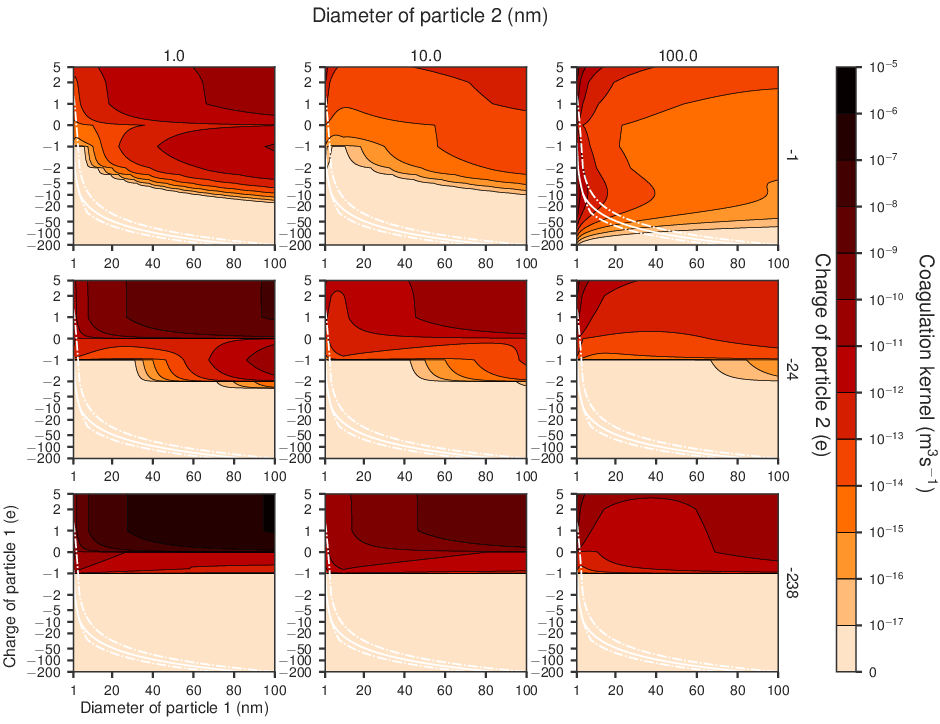

# Potentials and forces

## Description in terms of multipolar coefficients (MCP)

We need to solve the following linear system of A coefficients,
\begin{align}
A_{1,j_1} = Kq_1\delta_{j_1, 0} - \frac{\left( \varepsilon-1 \right)j_1}{\left( \varepsilon+1 \right)j_1+1}
\frac{r^{2j_1+1}_1}{r^{j_1+1}}Kq_2
+ \frac{\left( \varepsilon-1 \right)j_1}{\left( \varepsilon+1 \right)j_1+1}
\sum^{\infty}_{j_2=0} \sum^{\infty}_{j_3=0} \frac{\left( \varepsilon-1 \right)j_2}{\left( \varepsilon+1 \right)j_2+1}
\frac{\left(j_1+j_2\right)!}{j_1!j_2!}\frac{\left(j_2+j_3\right)!}{j_2!j_3!}
\frac{r^{2j_1+1}_1 r^{2j_2+1}_2}{r^{j_1+2j_2+j_3+2}}A_{1, j_3}.
\end{align}

Then the potential energy is,

\begin{align}
\Phi_{\text{MCP}} &= K\frac{q_1q_2}{r}\\
&-\frac{q_1}{2}\sum^{\infty}_{m=1} \sum^{\infty}_{l=0}A_{1,l}\frac{\left(\varepsilon-1\right)m}{\left(\varepsilon+1\right)m+1}
\frac{\left(l+m\right)!}{l!m!}\frac{r^{2m+1}_2}{r^{2m+l+2}}
-\frac{1}{2K}  \sum^{\infty}_{l=1} A_{1,l}A_{1,l}\frac{\left(\varepsilon+1\right)l+1}
{\left(\varepsilon-1\right)lr^{2l+1}_1},
\end{align}

and the force is written as,

\begin{equation}
F_{\text{MCP}} = K\frac{q_1q_2}{r^2}
-q_1\sum^{\infty}_{m=1} \sum^{\infty}_{l=0}A_{1,l}\frac{\left(\varepsilon-1\right)m\left(m+1\right)}{\left(\varepsilon+1\right)m+1}
\frac{\left(l+m\right)!}{l!m!}\frac{r^{2m+1}_2}{r^{2m+l+3}}
-\frac{1}{K} \sum^{\infty}_{l=1}  A_{1,l}A_{1,l+1}\frac{\left(\varepsilon+1\right)\left(l+1\right)+1}{\left(\varepsilon-1\right)r^{2l+3}_
1}.
\end{equation}

## Image potential approximation (IPA)

In the case that we can not neglect $r_2$ and $q_1\neq 0$, we could try to superpose the image potential energy of particle 1 in 2:

\begin{align}
\Phi_\text{IPA} = K\frac{q_1 q_2}{r}
-\left(\frac{\varepsilon-1}{\varepsilon+2}\right)\frac{K q^2_1 r^3_2}{2r^2\left( r^2-r^2_2\right)}
-\left(\frac{\varepsilon-1}{\varepsilon+2}\right)\frac{K q^2_2 r^3_1}{2r^2\left( r^2-r^2_1\right)},
\end{align}

and the total force is,
\begin{equation}
F^\text{T}_\text{IPA} = F_c + F_\text{IPA}(r_1, q_2) + F_\text{IPA}(r_2, q_1),
\end{equation}
where,
\begin{align}
 F_c &= K\frac{q_1 q_2}{r^2},\\
 F_\text{IPA}(r_1, q_2) &= -K q^2_2\left(\frac{\varepsilon-1}{\varepsilon+2}\right)\frac{r^3_1\left( 2r^2-r^2_1\right)}{r^3\left(r^2 - r^2_1\right)^2},\\
 F_\text{IPA}(r_2, q_1) &= -K q^2_1\left(\frac{\varepsilon-1}{\varepsilon+2}\right)\frac{r^3_2\left( 2r^2-r^2_2\right)}{r^3\left(r^2 - r^2_2\right)^2},
\end{align}
are the Coulomb force for two point particles, the image force between a neutral particle 1 and a point charge 2, and the image force between a neutral particle 2 and a point charge 1, respectively.


In [37]:
def potential_ipa_fact(rt, r21, q21, eps=Epsilon_Si):
    """ returns IPA potential
        function of rt = r/r1, r1, q1, r21=r2/r1, q21=q2/q1
    """

    kappa = (eps-1.0)/(eps+2.0)
    A = kappa*r21**3
    B = kappa*q21**2
    return q21/rt\
           - A/(2*rt**2*(rt**2 - r21**2))\
           - B/(2*rt**2*(rt**2 - 1.0))

def force_ipa_fact(rt, r21, q21, eps=Epsilon_Si):
    """ returns IPA force
    """

    kappa = (eps-1.0)/(eps+2.0)
    A = kappa*r21**3*(2.*rt**2-r21**2)
    B = kappa*q21**2*(2.*rt**2-1.)
    return q21/rt**2\
           - A/(rt**3*(rt**2 - r21**2)**2)\
           - B/(rt**3*(rt**2 - 1.0)**2)

In [38]:
def compute_Acoefficients(r1, q1, r2, q2, rn, eps=Epsilon_Si, j1max=5, j2max=5):
    ''' Solves the linear system for A coefficients
        This is a naive but illustrative implementation, and reproduces the results
        obtained in Phys. Chem. Chem. Phys. 18, 5883–5895 (2016).
    '''
    j1n = np.arange(1, j1max)
    j2n = np.arange(1, j2max)
    j3n = np.arange(0, j1max)
    # A10 term, always positive. l=0
    A10 = Ke*q1
    #
    coefficients = np.zeros((len(j1n), len(j1n)))
    independent = np.zeros((len(j1n)))
    #
    count = 0
    for j1 in j1n:# from 1 to j1max
        #
        prefac1 = (eps-1.0)*j1/((eps+1.0)*j1 + 1.0)
        # term due to Q2, j1!=0, always negative
        f2 = -prefac1*r1**(2*j1+1)*Ke*q2/rn**(j1+1)
        # this term is independent of coefficients A
        independent[j1-1] = f2
        for j3 in j3n:# from 0 to j1max
            for j2 in j2n:# from 1 to j2max
                #print(j1,j2,j3)
                count +=1
                prefac2 = (eps-1.0)*j2/((eps+1.0)*j2 + 1.0)
                denom = (np.math.factorial(j1)*np.math.factorial(j2)*np.math.factorial(j2)*np.math.factorial(j3))*rn**(j1+2*j2+j3+2)
                numer = prefac1 * prefac2 * np.math.factorial(j1+j2)*np.math.factorial(j2+j3) * r1**(2*j1+1) * r2**(2*j2+1)
                if True:
                    if j3!=0:
                        coefficients[j1-1][j3-1] -= numer / denom
                    else:# j3 == 0 => A10
                        independent[j1-1] += A10*numer / denom
            if j3==j1:
                coefficients[j1-1][j3-1] += 1.0
    return coefficients, independent, A10

In [39]:
def force_mpc(r1, q1, r2, q2, h, acoeffs, eps=Epsilon_Si, f1=1.0, f2=1.0, f3=1.0):
    ''' As defined in equation 9 of 
        Lindgren, E. B., Chan, H.-K., Stace, A. J. & Besley, E.
        Progress in the theory of electrostatic interactions between charged particles.
        Phys. Chem. Chem. Phys. 18, 5883–5895 (2016).
    '''
    invK = 1.0/Ke
    lns = np.arange(len(acoeffs))
    mns = np.arange(len(acoeffs)-1)+1
    #   
    force_coul = Ke*q1*q2/h**2# Coulomb term
    #
    force_2 = 0.0
    for m in mns:# m:1 -> lns
        for l in lns:# l:0 -> lns
            numer = (acoeffs[l]*(eps-1.0)*m*(m+1)*np.math.factorial(l+m)*r2**(2*m+1))
            denom = ((eps+1.0)*m+1)*(np.math.factorial(l)*np.math.factorial(m))*h**(2*m+l+3)
            force_2 += numer / denom

    force_2 *= -q1

    force_3 = 0.0
    for l in lns[1:-1]:# l:1 -> lns-1
        numer = (acoeffs[l]*acoeffs[l+1])*((eps+1.0)*(l+1)+1)#2016
        denom = (eps-1.0)*r1**(2*l+3)        
        force_3 += numer / denom

    force_3 *= -invK

    return f1*force_coul + f2*force_2 + f3*force_3

In [40]:
def potential_mpc(r1, q1, r2, q2, h, acoeffs, eps=Epsilon_Si):
    ''' As defined in equation A7 of 
        Bichoutskaia, Elena et al.
        Electrostatic analysis of the interactions between charged particles of dielectric materials.
        The Journal of Chemical Physics 133, 024105 (2010).
        Note 1/2 factor to last two terms as in
        Stace, A. J. & Bichoutskaia, E. 
        Reply to the Comment on Treating highly charged carbon and fullerene clusters as dielectric particles
        by H. Zettergren and H. Cederquist, Phys. Chem. Chem. Phys., 2012, 14, DOI: 10.1039/c2cp42883k.
        Phys. Chem. Chem. Phys. 14, 16771–16772 (2012).
    '''
    invK = 1.0/Ke
    lns = np.arange(len(acoeffs))
    mns = np.arange(len(acoeffs)-1)+1
    #   
    pot_coul = Ke*q1*q2/h# Coulomb term
    #
    pot_2 = 0.0
    for m in mns:# m:1 -> lns
        for l in lns:# l:0 -> lns
            numer = (acoeffs[l]*(eps-1.0)*m*np.math.factorial(l+m)*r2**(2*m+1))
            denom = ((eps+1.0)*m+1)*(np.math.factorial(l)*np.math.factorial(m))*h**(2*m+l+2)
            pot_2 += numer / denom

    pot_2 *= -q1
#     print(pot_2)
    pot_3 = 0.0
    for l in lns[1:]:# l:1 -> lns-1
        numer = (acoeffs[l]*acoeffs[l])*((eps+1.0)*(l)+1)
        denom = (eps-1.0)*l*r1**(2*l+1)
        pot_3 += numer / denom

    pot_3 *= -invK

    # 1/2 factor to last two terms
    return pot_coul + 0.5*pot_2 + 0.5*pot_3

In [41]:
def plot_potentials_paper(ax, r1o, q1o, r2o, q2o, eps, rlimo, j1max=25, j2max=25, label=r"r", lt="--", cerror=False):

    r1 = 1.0
    r2 = r2o/r1o
    q1 = np.sign(q1o)
    q2 = q2o/np.abs(q1o)

    rlim = rlimo/r1o#4.5(r1o+r2o)
    hl = np.linspace((r1+r2), rlim, 250)
    pot_b  = np.zeros_like(hl)
    pot_convertion = (1./const.elementary_charge)
    pot_prefactor = pot_convertion*q1o**2/r1o
    count = 0
    for l, h in enumerate(hl): 
        As, Fx, A10 = compute_Acoefficients(r1, q1, r2, q2, h, eps=eps, j1max=j1max, j2max=j2max)
        #Acs = np.linalg.solve(As, Fx)
        Acond = np.linalg.cond(As)
        if Acond > 1.5:
            count += 1
            print(Acond)
        if count > 20:
            return 0 
        Acs, res, rank, s = np.linalg.lstsq(As, Fx)
        acoeffs = np.append(A10, Acs)
        pot_b[l] = potential_mpc(r1, q1, r2, q2, h, acoeffs, eps=eps)

    sl = (hl*r1o-r1o-r2o)*1e9
        

    # Plot IPA potential
    pot_ipa = potential_ipa_fact(hl, r2, np.abs(q2), eps=eps)*pot_prefactor*Ke
    pipa = ax.plot(hl*r1o*1e9, pot_ipa, label='IPA', zorder=1, lw=2, color='k')
    color = pipa[-1].get_color()

    plt.plot(hl*r1o*1e9, pot_prefactor*pot_b, '--', color='gray', zorder=2, lw=3, label='MCP')

    return pot_ipa, pot_prefactor*pot_b

Potential barrier for  $r_1 = 1\text{nm},\, r_2 = 50\text{nm}$ and $q_1 = q_2 = -e$.

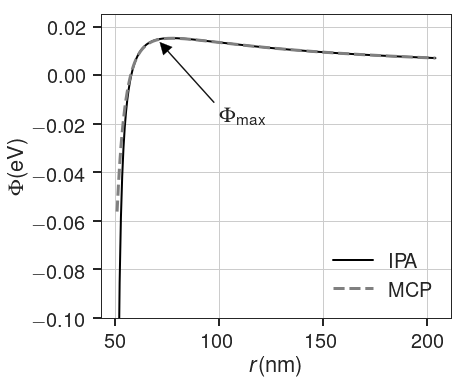

In [42]:
fig, ax = plt.subplots(figsize=(7, 5.85))
r1 = 50.0e-9
z1 = -1
q1 = z1*const.elementary_charge
z2 = -1
q2 = z2*const.elementary_charge
#r2nm = np.linspace(1, 100, 5)
r2nm = np.array([1.0])
r2m = r2nm*1e-9
rlim = np.max(r1+r2m)*4.0

phix=[plot_potentials_paper(ax, r1, q1, r2m, q2, Epsilon_Si, rlim, label=r'$r_2=$'+str(r2nm[i]), j1max=10, j2max=10) for i, r2 in enumerate(r2m)]

ax.set(xlabel=r'$r$(nm)', ylabel=r'\textPhi(eV)')

plt.ylim([-0.10, 0.025])

ax.annotate(r'\textPhi$_\text{max}$', xy=(70, 0.015), xytext=(100, -0.02), size=22,
            arrowprops=dict(facecolor='black', shrink=0.05, width=1),
            )
plt.legend()
plt.tight_layout()
plt.savefig('figB1.eps')
plt.show()

## Potential description comparison

### Potential at contact

Here we show the IPA and the MCP potentials at contact.

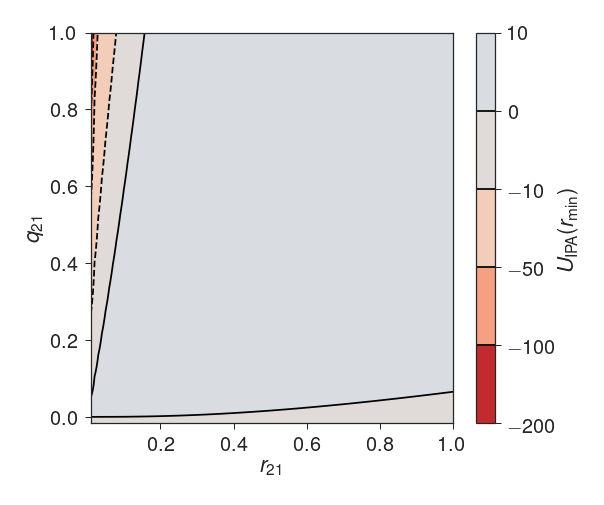

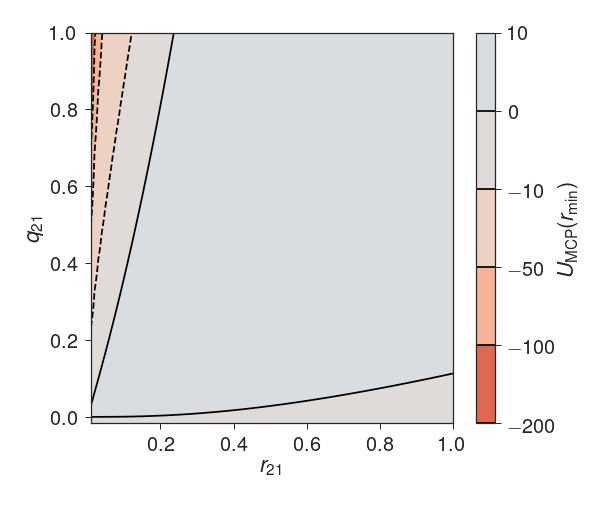

The next figure represents the relative error,
assuming that the MCP is the real value:

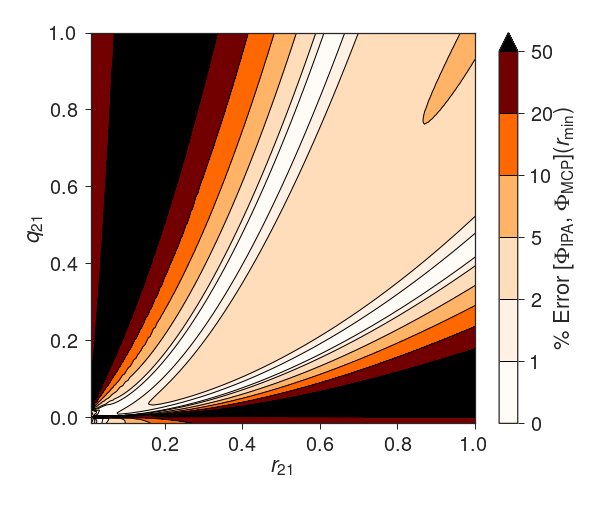

### Barrier potential

Next we show the potential barriers and the relative error:

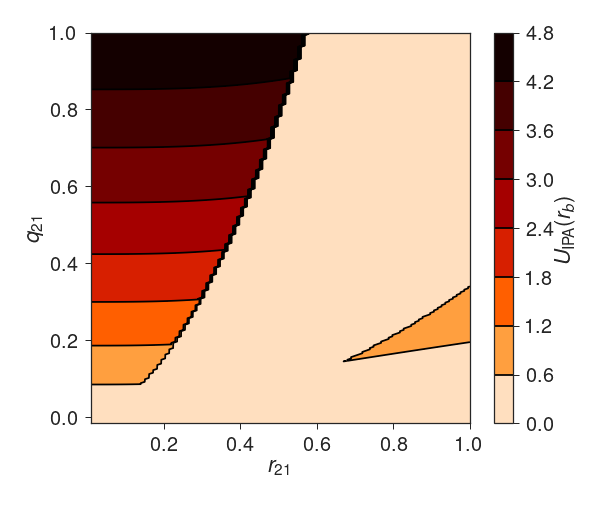

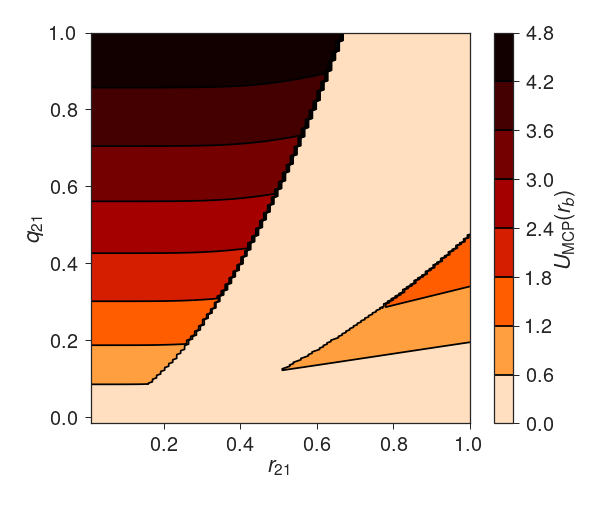

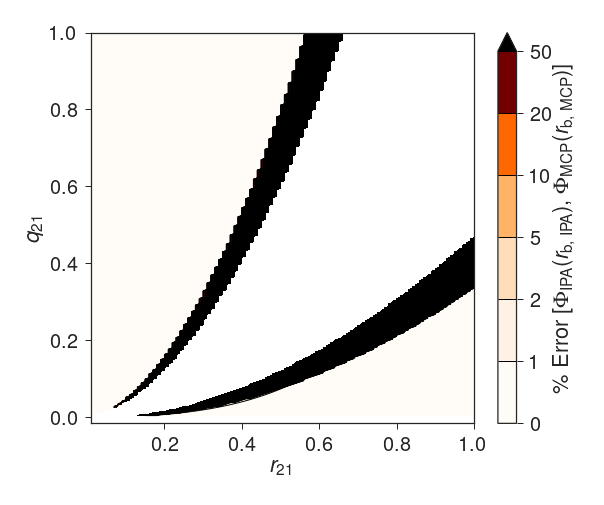

### Number of multipolar coefficients

In the next figure we plot the logarithm of the number of multipolar coefficients corresponding to the convergence criterion, as a function of size and charge ratios.

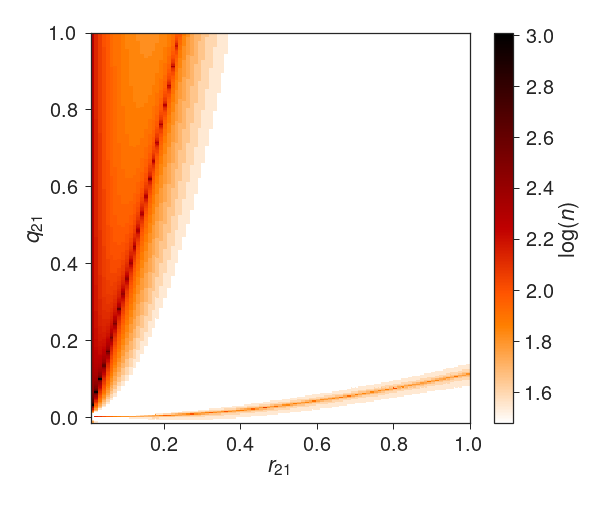

## IPA Enhancement

In the next figure we plotted the IPA enhancement factor for neutral particles.

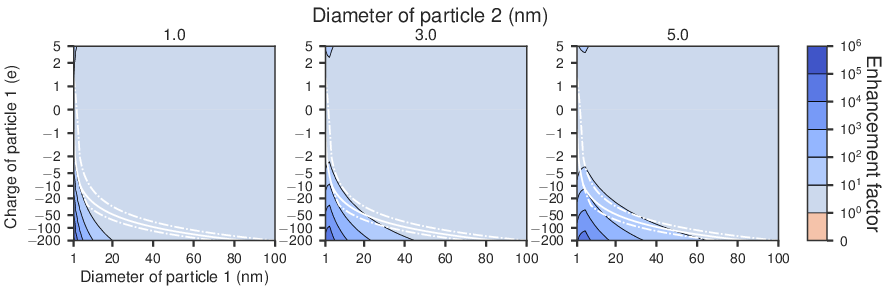

Also, we computed the IPA enhancement factor for charged particles.

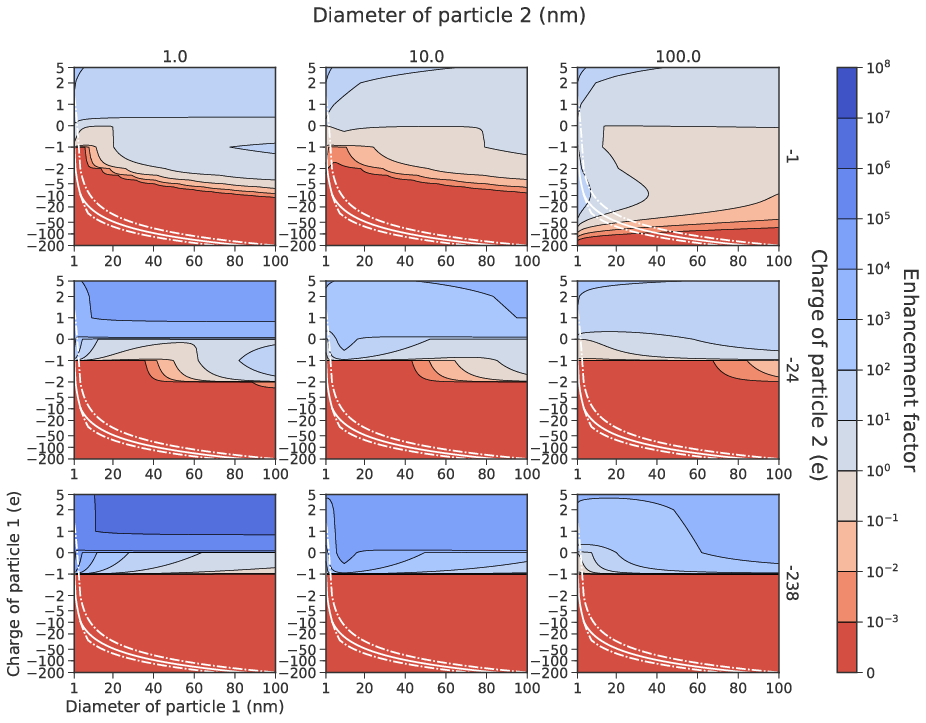

## IPA barrier

Finally, here we compute the IPA barrier using the dimensionless force:

\begin{equation}
    \hat{F}_\text{IPA}(\tilde{r}, r_{21}, q_{21}) = \Deriv{\hat{\Phi}_\text{IPA}}{\tilde{r}},
\end{equation}

following the dimensionless potential,

  \begin{align}
    \hat{\Phi}_\text{IPA}(\tilde{r}, r_{21}, q_{21}) = 
    \frac{q_{21}}{\tilde{r}}
    -\kappa\frac{r^3_{21}}{2\tilde{r}^2\left( \tilde{r}^2-r^2_{21}\right)}
    -\kappa\frac{q^2_{21}}{2\tilde{r}^2\left( \tilde{r}^2-1\right)},
  \end{align}

using the following definitions: $\kappa=\left(\frac{\varepsilon-1}{\varepsilon+2}\right)$, $\tilde{r}=r/r_i$, $r_{21}=r_j/r_i$, $q_{21}=q_j/q_i$.

The dimensionless force is equal to zero at $\tilde{r}=\tilde{r}_\text{max}$, that is,

  \begin{align}
    \tilde{r}_\text{max} = 
    \left.\kappa\frac{r^3_{21}\left( 2\tilde{r}^2-r^2_{21}\right)}{q_\text{21}\left( \tilde{r}^2-r^2_{21}\right)^2}
    \right|_{\tilde{r}=\tilde{r}_\text{max}}
   +\left.\kappa\frac{q_{21}\left( 2\tilde{r}^2-1\right)}{\left( \tilde{r}^2-1\right)^2}
    \right|_{\tilde{r}=\tilde{r}_\text{max}},
  \end{align}
  
when the Coulomb repulsive term is equal to the attractive terms. Simple case for particles of same size $r_\text{21}=1$,

  \begin{align}
    \tilde{r}_\text{max} = \kappa
    \frac{(1+q^2_{21})}{q_{21}}
    \frac{\left( 2\tilde{r}^2_\text{max}-1\right)}{\left( \tilde{r}^2_\text{max}-1\right)^2}.  
  \end{align}
Graphically we can find $r_\text{max}$ as the intersection between the dotted line and the curves for different values of charge rate, as follows,

In [43]:
def r2term(rt, q21, eps=Epsilon_Si):
    kappa = (eps-1.0)/(eps+2.0)
    qfrac = (1.0+q21**2)/q21
    rterm = (2.0*rt**2-1.0)/((rt**2-1.0)**2)
    return kappa*qfrac*rterm

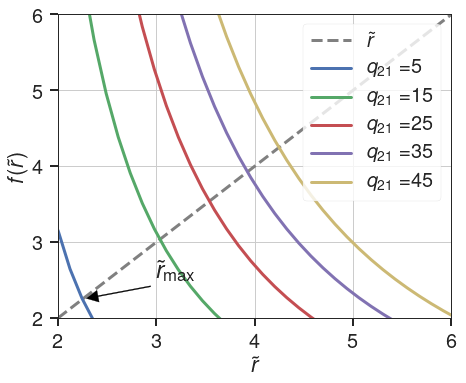

In [44]:
fig, ax = plt.subplots(figsize=(7, 5.85))
q21array = np.arange(5, 50, 10)
rtarray = np.linspace(2.0, 8.0)
ax.set(xlabel=r'$\tilde{r}$', ylabel=r'$f(\tilde{r})$')
plt.xlim([2.0, 6.0])
plt.ylim([2.0, 6.0])
plt.plot(rtarray, rtarray, '--', color='gray', label=r'$\tilde{r}$', lw=3)
[plt.plot(rtarray, r2term(rtarray, qelem), label=r'$q_{21}=$'+str(qelem), lw=3) for qelem in q21array]
ax.annotate(r'$\tilde{r}_\text{max}$', xy=(2.25, 2.25), xytext=(3, 2.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
           )
legend=plt.legend(loc=1, frameon=True)
legend.get_frame().set_facecolor('w')
plt.tight_layout()
plt.savefig('figC1.eps')
plt.show()

In the case of equally charged spheres ($q_{21}=1$) for different size ratios $r_{21}$, we have,

In [45]:
def rfull(rt, r21, q21, eps=Epsilon_Si):
    kappa = (eps-1.0)/(eps+2.0)
    rterm1 = (2.0*rt**2-r21**2)*r21**3/(q21*(rt**2-r21**2)**2)
    rterm2 = (2.0*rt**2-1.0)*q21/(rt**2-1.0)**2
    return kappa*(rterm1+rterm2)
    kappa = (eps-1.0)/(eps+2.0)
    qfrac = (1.0+q21**2)/q21
    rterm = (2.0*rt**2-1.0)/(rt**3*(rt**2-1.0)**2)
    return kappa*qfrac*rterm

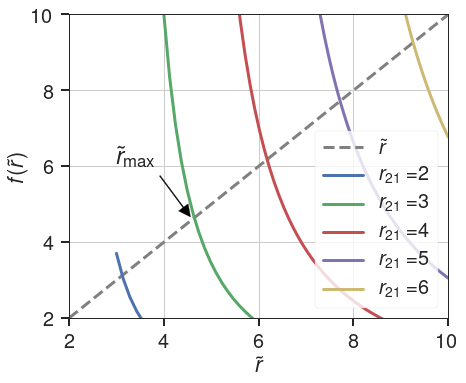

In [46]:
fig, ax = plt.subplots(figsize=(7, 5.85))
r21array = np.arange(2, 7, 1)
rtarray = np.linspace(2.0, 10.0)
ax.set(xlabel=r'$\tilde{r}$', ylabel=r'$f(\tilde{r})$')
plt.xlim([2.0, 10.0])
plt.ylim([2.0, 10.0])
plt.plot(rtarray, rtarray, '--', color='gray', label=r'$\tilde{r}$', lw=3)
[plt.plot(np.linspace(relem+1, 10.0), rfull(np.linspace(relem+1, 10.0), relem, 1.0), label=r'$r_{21}=$'+str(relem), lw=3) for relem in r21array]
ax.annotate(r'$\tilde{r}_\text{max}$', xy=(4.6, 4.6), xytext=(3, 6),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             )
legend=plt.legend(loc=4, frameon=True)
legend.get_frame().set_facecolor('w')
plt.tight_layout()
plt.savefig('figC2.eps')
plt.show()

For high charge and size ratios ($r_{21}=q_{21}=50$):

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


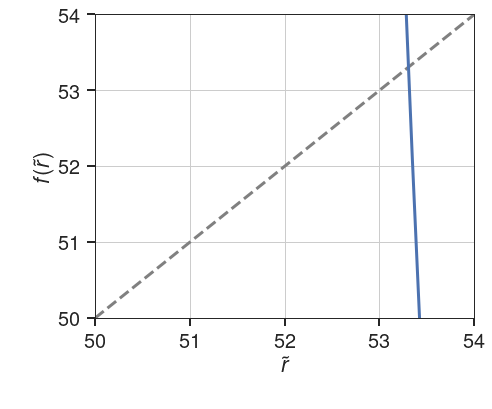

In [47]:
fig, ax = plt.subplots(figsize=(7, 5.85))
ax.set(xlabel=r'$\tilde{r}$', ylabel=r'$f(\tilde{r})$')

r21 = 50.0
q21 = 50.0
rc = 1.0+r21
rt = np.linspace(r21, r21+4.0)
plt.plot(rt, rt, '--', color='gray', label=r'$\tilde{r}$', lw=3)
plt.xlim([r21, r21+4.0])
plt.ylim([r21, r21+4.0])
plt.plot(rt, rfull(rt, r21, q21), label=r'$r_{21}=$', lw=3)
ax.annotate(r'$\tilde{r}_\text{max}$', xy=(4.6, 4.6), xytext=(3, 6),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             )
# legend=plt.legend(loc=4, frameon=True)
# legend.get_frame().set_facecolor('w')
plt.tight_layout()
plt.savefig('figC3.eps')
plt.show()